# Fundamental Statistical Analysis (linear and logistic regression techniques)
## Scenario

A data scientist working in a venture capital investment firm. He has been given some
data about a potential company to invest in. He needs to create some models to predict what the
potential company will be like in 12 months' time.


## About this project

This project focuses on fundamental statistical analysis, which
will apply linear and logistic regression techniques on one or more
data sets.

- Identify the appropriate Data Science analysis for a problem and
  apply that method to the problem.

- Interpret Data Science analyses and summarise and identify the most
  important aspects of a Data Science analysis.

In [115]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model,metrics
import sklearn.linear_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix


I'm only using libraries from panda, sklearn, and numpy.



### Load the Data

- Loaded the data into a DataFrame using `pd.read_csv()` into a variable called `df`.



In [116]:
df = pd.read_csv('48849855_Cochran_LLC_PLC.csv')
df.head()

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
0,1,31665663.39,13071.26,4.1163,0,Negative
1,2,29205967.35,21781.64,4.3381,0,Negative
2,3,30418749.46,26865.96,4.4292,0,Negative
3,4,33955359.07,35216.11,4.5467,0,Negative
4,5,34313947.08,37571.16,4.5749,0,Negative




### Inspect the Data

- Listed the column names using `df.columns`.



In [117]:
print(df.columns)

Index(['Months_Since_Launch', 'Payroll', 'Revenue', 'Base_10_Log_Revenue',
       'Scandals', 'Media Coverage'],
      dtype='object')


There are six Series in the data frame:
1. Months since launch - This one represents time elapsed since launch of the company.
2. Payroll—This colum shows how much salary a company is paying to its employees.
3. Revenue colum shows the turnover of the company.
4. By using log10, we are reducing the scale of data to a smaller number, which is easy to interpret data.
5. Scandals seem to be related to any financial fraud or unethical activities in a company.
6. This represents the state of company reputation represented by media.


In [118]:
df.info()  # Checks column names and data types
df.head()  # gives the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Months_Since_Launch  24 non-null     int64  
 1   Payroll              24 non-null     float64
 2   Revenue              24 non-null     float64
 3   Base_10_Log_Revenue  24 non-null     float64
 4   Scandals             24 non-null     int64  
 5   Media Coverage       24 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ KB


,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
0,1,31665663.39,13071.26,4.1163,0,Negative
1,2,29205967.35,21781.64,4.3381,0,Negative
2,3,30418749.46,26865.96,4.4292,0,Negative
3,4,33955359.07,35216.11,4.5467,0,Negative
4,5,34313947.08,37571.16,4.5749,0,Negative




### Visualise Payroll Over Time

- Created a line plot clearly showing payroll over months since launch.



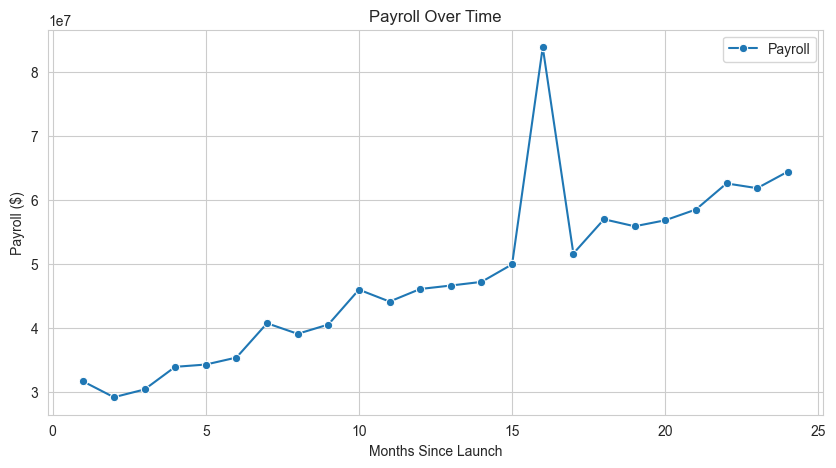

In [119]:

# Size of the plot
plt.figure(figsize=(10, 5))
# Line plot using Months_Since_Launch and Payroll columns where X is months and Y is Payroll
sns.lineplot(x=df['Months_Since_Launch'], y=df['Payroll'], marker='o', linestyle='-', label='Payroll')


# Label the X and Y axes so that the graph is easy to understand
plt.xlabel("Months Since Launch")
plt.ylabel("Payroll ($)")
plt.title("Payroll Over Time")
plt.legend()
# This will keep the grid on for better visualisation; if you set it to False, it will turn off the grid in the graph
plt.grid(True)
plt.show()



### Identifying and briefly discussing visible outliers



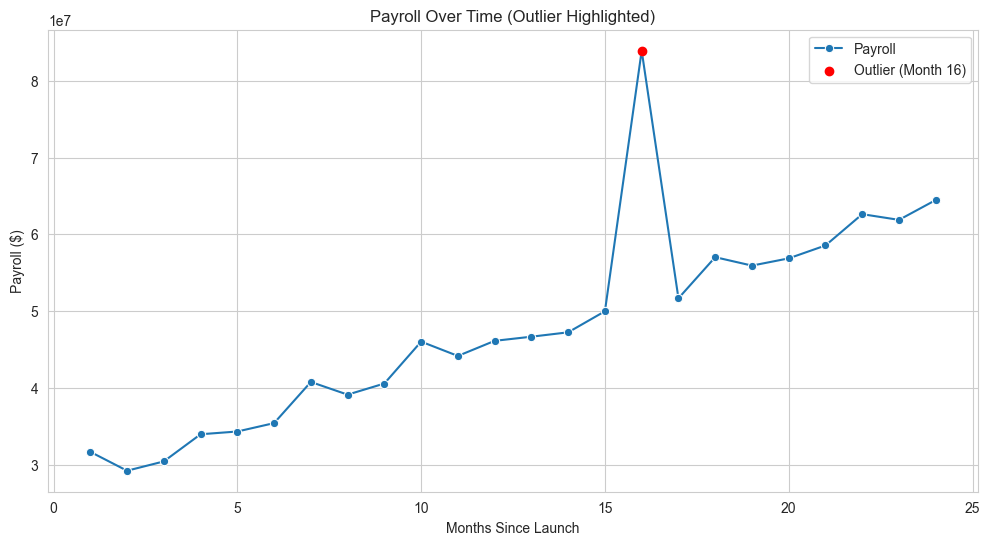

Outlier detected at Month 16 with Payroll: $83910399.83


In [120]:
# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Months_Since_Launch'], y=df['Payroll'], marker='o', linestyle='-', label='Payroll')

# Highlight the outlier at the 16th month
outlier_month = 16
# filtering the rows with month value 16th and making a small df containing value for this month, also it will provide the value of payroll for the same month.
outlier_value = df[df['Months_Since_Launch'] == outlier_month]['Payroll'].values[0]

# this will highlight the outliner month in graph
plt.scatter(outlier_month, outlier_value, color='red', label='Outlier (Month 16)', zorder=5)

# Customize the plot
plt.xlabel("Months Since Launch")
plt.ylabel("Payroll ($)")
plt.title("Payroll Over Time (Outlier Highlighted)")
plt.grid(True)
plt.legend()
plt.show()

# Print information about the outlier
print(f"Outlier detected at Month {outlier_month} with Payroll: ${outlier_value}")

— The Payroll has been increasing over the period of 24 months, and there is a sudden spike in the 16th month. We can observe small fluctuations in month 7, 10, 18, and 22.

— From this chart, we can assume hiring trends in the company.



## Linear Regression: Payroll

### Step-by-step breakdown:

- Created training, validation, and test sets correctly:
  - Training: all months except the last two.
  - Validation: second-last month.
  - Test: last month.



In [121]:
# Ensures that the data is sorted by Months_Since_Launch
data = df.sort_values(by='Months_Since_Launch')

# Created training, validation, and test sets
train_df = df.iloc[:-2]  # All months except the last two
val_df = df.iloc[-2:-1]  # Second-to-last month (validation set)
test_df = df.iloc[-1:]  # Last month (test set)

# Print sizes of each set
print("Training set size:", train_df.shape)
print("Validation set size:", val_df.shape)
print("Test set size:", test_df.shape)


Training set size: (22, 6)
Validation set size: (1, 6)
Test set size: (1, 6)


In [122]:
#print all sets separately
print('Training set: \n',train_df)
print('Validation set: \n',val_df)
print('Testing set: \n',test_df)

Training set: 
     Months_Since_Launch      Payroll     Revenue  Base_10_Log_Revenue  \
0                     1  31665663.39    13071.26               4.1163   
1                     2  29205967.35    21781.64               4.3381   
2                     3  30418749.46    26865.96               4.4292   
3                     4  33955359.07    35216.11               4.5467   
4                     5  34313947.08    37571.16               4.5749   
5                     6  35406830.21    53093.39               4.7250   
6                     7  40766617.07    65360.82               4.8153   
7                     8  39114209.10   104404.16               5.0187   
8                     9  40565000.80   122931.37               5.0897   
9                    10  46020064.85   161692.37               5.2087   
10                   11  44155171.22   173990.51               5.2405   
11                   12  46122724.45   186311.15               5.2702   
12                   13  46662902.7


  
### Train an Ordinary Least Squares (OLS) regressor.



In [123]:

# Defined features (X) and target (y) for the training set
X_train = train_df[['Months_Since_Launch']]
y_train = train_df['Payroll']

# Initialize the OLS regressor
ols = sklearn.linear_model.LinearRegression()
#ols_model = LinearRegression()

# Train the model (fit the regressor to the training data)
ols.fit(X_train, y_train)

# Print the coefficients and intercept
print("Model Coefficients:", ols.coef_)
print("Model Intercept:", ols.intercept_)


Model Coefficients: [1672606.72949746]
Model Intercept: 27225495.76805195



### Train a robust regressor (Huber Regressor)



In [124]:

# Define features (X) and target (y) for the training set
#X_train = train_df[['Months_Since_Launch']]
#y_train = train_df['Payroll']

# Initialize the robust regressor
robust_model = sklearn.linear_model.HuberRegressor()

# Train the model
robust_model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Model Coefficients:", robust_model.coef_)
print("Model Intercept:", robust_model.intercept_)


Model Coefficients: [1155591.34025661]
Model Intercept: 31821668.27175965




### Clearly identify and justify an appropriate evaluation metric



As we can see that there is a rouge data point in the 16th month, the Huber Regressor is the best for this case. It will provide a clean and stable solution by reducing the influence of this data point.

OLS is not suitable for this case as it will treat that rouge data point same as any other data point, and it can give wrong predication.



### Evaluation of both models using the validation set to see which performed better.



In [125]:
# validation set features and target
#X_val = val_df[['Months_Since_Launch']]
#y_val = val_df['Payroll']

# Predict using the OLS model
#ols_predictions = ols.predict(X_val)
# to evaluate these models, we will use similar method same as week 2 prac
#val_df.Payroll - ols_predictions

In [126]:
# validation set features and target
# = val_df[['Months_Since_Launch']]
#y_val = val_df['Payroll']
# Predict using the Robust model (Huber Regressor)
#huber_predictions = huber.predict(X_val)
# to evaluate these models, we will use similar method same as week 2 prac
#val_df.Payroll - huber_predictions

In [127]:
# validation set features and target
X_val = val_df[['Months_Since_Launch']]
y_val = val_df['Payroll']

# Predict using the OLS model
ols_predictions = ols.predict(X_val)
#ols_mae = sklearn.metrics.mean_absolute_error(y_val, ols_predictions)
ols_mae = metrics.mean_absolute_error(y_val, ols_predictions)
ols_mse = metrics.mean_squared_error(y_val, ols_predictions)

# Predict using the Robust model (Huber Regressor)
# not putting the name of variable as huber_prediction, huber_mae or huber_mse because just in case I have to change my model in future
robust_predictions = robust_model.predict(X_val)
#robust_mae = sklearn.metrics.mean_absolute_error(y_val, robust_predictions)
robust_mae = metrics.mean_absolute_error(y_val, robust_predictions)
robust_mse = metrics.mean_squared_error(y_val, robust_predictions)

# Print the validation results
print(f"OLS Model MAE on Validation Set: {ols_mae}")
print(f"Robust Model MAE on Validation Set: {robust_mae}")
print("OLS Model MSE on Validation Set: {:.4f}".format(ols_mse))
print("Robust Model MSE on Validation Set: {:.4f}".format(robust_mse))

# Compare and decide which is better
if ols_mae < robust_mae:
    print("The OLS model performed better when we use MAE on the validation set.")
else:
    print("The Robust model (Huber Regressor) performed better when we use MAE on the validation set.")
# compare with mse
if ols_mse < robust_mse:
    print("The OLS model performed better when we use MSE on the validation set.")
else:
    print("The Robust model (Huber Regressor) performed better when we use MSE on the validation set.")


OLS Model MAE on Validation Set: 3816393.646493502
Robust Model MAE on Validation Set: 3478787.8023382872
OLS Model MSE on Validation Set: 14564860464995.9688
Robust Model MSE on Validation Set: 12101964573697.6504
The Robust model (Huber Regressor) performed better when we use MAE on the validation set.
The Robust model (Huber Regressor) performed better when we use MSE on the validation set.


Answer:
To evaluate both models, we need to use validation data along with MAE or MSE (performance metrics). Both MAE and MSE are indicating that Huber Regressor is performing better, but since outliners can influence MSE, so in this case, MAE is better as it is insensitive to outliners.

Conclusion: The Robust model performed better as MAE (Mean absolute error) is less than an OLS model. I'll not use MSE as performance metrics further in this project as number is not realistic, and it will only give us unrealistic results like the above.



### Report accuracy of the best-performing model on the test set.



In [128]:
# since HuberRegressor is the best-performing model determined during validation
X_test = test_df[['Months_Since_Launch']]
y_test = test_df['Payroll']

#fit the model on training data
#robust_model.fit(X_train, y_train)
#ols.fit(X_train, y_train)

# Predict on the test set
robust_model_test_predictions = robust_model.predict(X_test)
ols_test_predictions = ols.predict(X_test)

# MAE for accuracy reporting
robust_model_test_mae = metrics.mean_absolute_error(y_test, robust_model_test_predictions)
ols_test_mae = metrics.mean_absolute_error(y_test, ols_test_predictions)

# Report the accuracy
print(f"Mean Absolute Error of the Best Model on the Test Set: {robust_model_test_mae:.4f}")
print("Test Prediction (Single Sample):", robust_model_test_predictions)
print(f"Mean Absolute Error of the OLS Model on the Test Set: {ols_test_mae:.4f}")
print("Test Prediction (Single Sample):", ols_test_predictions)
print("Actual Value (Single Sample):", y_test)

# Compare and decide which is better
if ols_test_mae < robust_model_test_predictions:
    print("The OLS model performed better on the test set.")
else:
    print("The Robust model (Huber Regressor) performed better on the test set.")

Mean Absolute Error of the Best Model on the Test Set: 4909021.2421
Test Prediction (Single Sample): [59555860.43791832]
Mean Absolute Error of the OLS Model on the Test Set: 2903175.5960
Test Prediction (Single Sample): [67368057.27599096]
Actual Value (Single Sample): 23    64464881.68
Name: Payroll, dtype: float64
The OLS model performed better on the test set.


### Reflection of models
- As you can see, that both test results and validation results are conflicting with each other.
Theoretically, a Huber model should have outperformed the OLS model because an OLS model handles outliners poorly. But since we are limited to using only a single data point for assessing, the results for OLS model might have given better results by chance or this particular sample aligns with OLS's assumptions.
In my opinion, a Huber model has broder use case in this type of predictions as they work really well when it comes to handling outliners.

### Payroll Prediction

- Best estimate for payroll in 12 months.



In [129]:
X_predict = pd.DataFrame([[36]], columns=['Months_Since_Launch'])

# HuberRegressor model to predict the payroll
robust_model_36_month_prediction = robust_model.predict(X_predict)

# Provide the estimate
print(f"Estimation of Payroll in the 36th Month: {robust_model_36_month_prediction[0]:.2f}")


Estimation of Payroll in the 36th Month: 73422956.52


The Estimation of Payroll in the 36th Month is 73422956.52, which is 1.14 times higher than the payroll in the 24th month (64464881.68).



### Estimation for uncertainty
  (keeping in mind the evaluation metric)
  


In [130]:

# MAE from Validation Set
uncertainty_range_36 = robust_model_36_month_prediction[0] + np.array([-1, 1]) * robust_mae

# Print estimated payroll with uncertainty
print(f"Estimated Payroll with Uncertainty: ${uncertainty_range_36[0]:.2f} to ${uncertainty_range_36[1]:.2f}")


Estimated Payroll with Uncertainty: $69944168.72 to $76901744.32


### Story Board:
1. why did I choose Huber Regressor over OLS or any other Regressors like Theil-Sen, RANSAC?

Answer:
— a Huber model is known for its insesitive nature to outliners while models like OLS will perform poorly when subjected to a similar situation. But in test set OLS performed better, but that is just a coincidence because we only single data point in a test set.

1. After deciding which model to choose (we choose Huber), we decided that there are multiple ways to evaluate like MAE, MSE, R^2, and RSME
But to do R^2 we need at least two samples (eliminated).
MSE and RMSE (are sensitive to outliners) I don't want to do my predictions based on or influenced by one single data point.

2. So finally, We have selected MAE as this will not react to outliners. (We have validated this theory while doing the validation testing)



## Revenue Visualisation and Transformation

- Visualise revenue over time.



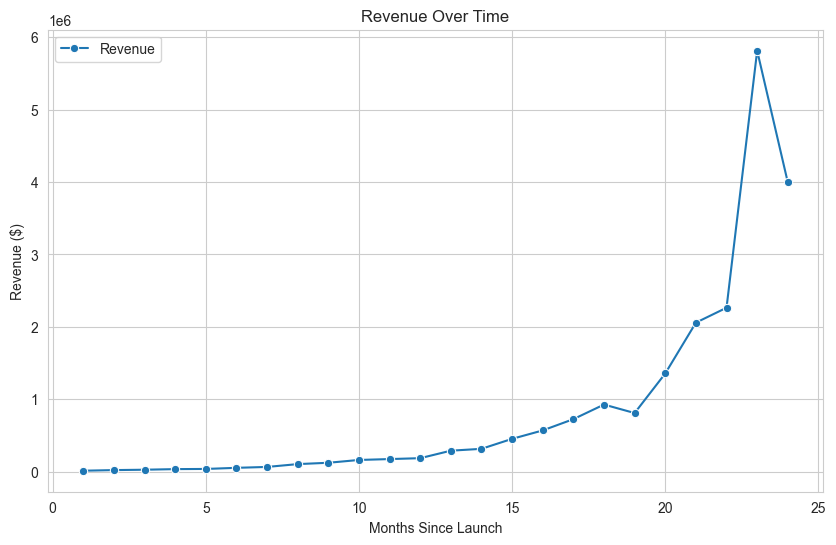

In [131]:
# Visualize Revenue Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Months_Since_Launch'], y=df['Revenue'], marker='o', linestyle='-', label='Revenue')

# Customize Plot
plt.xlabel("Months Since Launch")
plt.ylabel("Revenue ($)")
plt.title("Revenue Over Time")
plt.grid(True)
plt.legend()
plt.show()


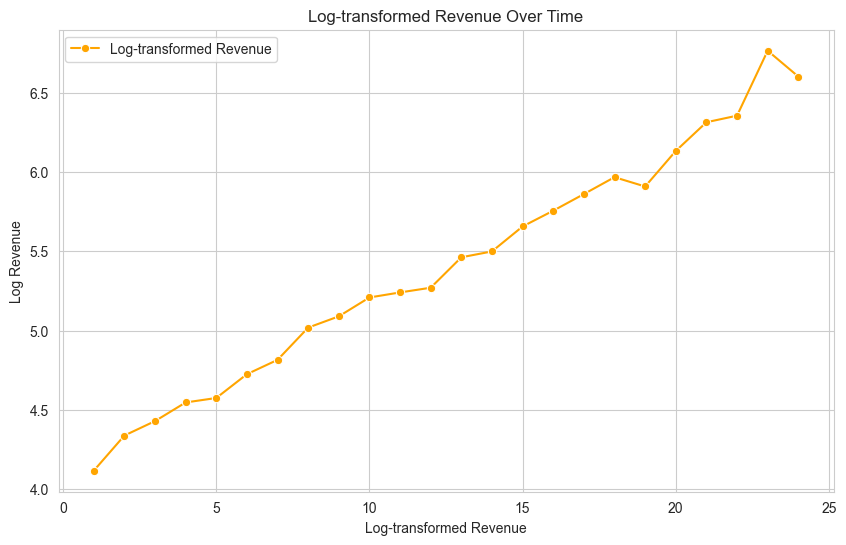

In [132]:
# Visualize Revenue Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Months_Since_Launch'], y=df['Base_10_Log_Revenue'], marker='o', linestyle='-', label='Log-transformed Revenue', color='orange')

# Customize Plot
plt.xlabel("Log-transformed Revenue")
plt.ylabel("Log Revenue")
plt.title("Log-transformed Revenue Over Time")
plt.grid(True)
plt.legend()
plt.show()




### Explanation for applying a log transformation to revenue may help linear modelling.



There are multiple reasons to use log-transformed revenue:
1. It can normalise the data which is easy to interpret.
2. Variance in the revenue column is very high while we know that linear models assume that errors have constant variance, so having a high variance will create difficulties when predicting future revenues.
3. In addition, I already know that I have to predict future data this log revenue will help me create a linear relationship.



## Revenue Modelling

- Trained a linear regression model on the original revenue data.



In [133]:
# Feature (independent variable) and target (dependent variable)
X_train = train_df[['Months_Since_Launch']]
y_train = train_df['Revenue']

# Initialize linear regression model
linear_model_original = HuberRegressor()

# Train the model on training data
linear_model_original.fit(X_train, y_train)

# Print coefficients
print("Slope (Coefficient):", linear_model_original.coef_)
print("Intercept:", linear_model_original.intercept_)


Slope (Coefficient): [56962.43708641]
Intercept: -270561.7793366122




## Training a linear regression model on the log-transformed revenue data.



In [134]:
# Feature (Months_Since_Launch) and Target (Log_Revenue)
X_train = train_df[['Months_Since_Launch']]
y_train = train_df['Base_10_Log_Revenue']

# Initialize the linear regression model
linear_model_log = HuberRegressor()

# Train the model on training data
linear_model_log.fit(X_train, y_train)

# Print the coefficients
print("Slope (Coefficient):", linear_model_log.coef_[0])
print("Intercept:", linear_model_log.intercept_)


Slope (Coefficient): 0.10181592442563914
Intercept: 4.121372366480968




### Comparing both models clearly and identify the better-performing model.



In [135]:
# Define independent variable (Months_Since_Launch)
X = df[["Months_Since_Launch"]].values  # Ensure it’s in 2D format for sklearn models

# Define dependent variables
y_original = df["Revenue"].values  # Original Revenue
y_log = df["Base_10_Log_Revenue"].values  # Log-Transformed Revenue (Base 10)

# Split data into training and testing sets
X_train, X_test, y_train_original, y_test_original, y_train_log, y_test_log = train_test_split(
    X, y_original, y_log, test_size=0.2, random_state=42
)



In [136]:
# fit the original revenue model

linear_model_original.fit(X_train, y_train_original)
# Function to evaluate Original Revenue Model
def evaluate_original_model(model, X_train, y_train, X_test, y_test):

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics_original = {
        "MAE (Train)": mean_absolute_error(y_train, y_train_pred),
        "MAE (Test)": mean_absolute_error(y_test, y_test_pred),
        "RMSE (Train)": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE (Test)": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "R-squared (Train)": r2_score(y_train, y_train_pred),
        "R-squared (Test)": r2_score(y_test, y_test_pred),
    }

    return metrics_original


# Example usage (ensure your actual `original_model` exists):
metrics_original = evaluate_original_model(
    model=linear_model_original,
    X_train=X_train,
    y_train=y_train_original,
    X_test=X_test,
    y_test=y_test_original
)

# Print the evaluation metrics for Original Revenue Model
print("Original Revenue Model Metrics:")
for metric, value in metrics_original.items():
    print(f"{metric}: {value:.4f}")


Original Revenue Model Metrics:
MAE (Train): 609613.1708
MAE (Test): 437808.2317
RMSE (Train): 1095302.3398
RMSE (Test): 456427.7104
R-squared (Train): 0.4842
R-squared (Test): -0.9222


In [137]:
# fit the Linear Regression model for Log Revenue

linear_model_log.fit(X_train, y_train_log)

# Function to evaluate Log Revenue Model
def evaluate_log_model(model, X_train, y_train, X_test, y_test):
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics_log = {
        "MAE (Train)": mean_absolute_error(y_train, y_train_pred),
        "MAE (Test)": mean_absolute_error(y_test, y_test_pred),
        "RMSE (Train)": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE (Test)": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "R-squared (Train)": r2_score(y_train, y_train_pred),
        "R-squared (Test)": r2_score(y_test, y_test_pred),
    }

    return metrics_log


# Evaluate the Log-Transformed Revenue Model
metrics_log = evaluate_log_model(
    model=linear_model_log,
    X_train=X_train,
    y_train=y_train_log,
    X_test=X_test,
    y_test=y_test_log
)

# Print the evaluation metrics
print("Log-Transformed Revenue Model Metrics:")
for metric, value in metrics_log.items():
    print(f"{metric}: {value:.4f}")


Log-Transformed Revenue Model Metrics:
MAE (Train): 0.0397
MAE (Test): 0.0806
RMSE (Train): 0.0727
RMSE (Test): 0.0967
R-squared (Train): 0.9905
R-squared (Test): 0.9779


1. The above data shows that log transformed data model is the real deal as it outperforms the original data model in accuracy.

2. The scale of data in an original data model is the reason for its inaccuracy.



## Predicting revenue 12 months ahead

  


In [138]:

# Define feature (month) and target (log10 revenue)
X = df[['Months_Since_Launch']]
y_log = df['Base_10_Log_Revenue']

# Train Huber Regressor
huber_model = HuberRegressor()
huber_model.fit(X, y_log)

# Predict log10 revenue at month 36
#month_36 = np.array([[36]])
month_36 = pd.DataFrame({'Months_Since_Launch': [36]})
log_revenue_pred = huber_model.predict(month_36)[0]

# Convert log10 prediction back to actual revenue (dollars)
revenue_pred = 10 ** log_revenue_pred

# Print result
print(f"Predicted Revenue for Month 36: ${revenue_pred:.2f}")


Predicted Revenue for Month 36: $66174993.22


In [139]:
# Extend Months_Since_Launch for the next 12 months
#last_month_since_launch = df['Months_Since_Launch'].max()
#future_months = pd.DataFrame({
    #'Months_Since_Launch': range(last_month_since_launch + 1, last_month_since_launch + 13)
#})


# Define features and target for revenue training
# Define features ('Months_Since_Launch') and target variable ('Base_10_Log_Revenue') for training
#X_train_revenue = train_df[['Months_Since_Launch']]
#y_train_revenue_log = train_df['Base_10_Log_Revenue']


# Train the OLS model on Base_10_Log_Revenue
#linear_model_log_revenue = LinearRegression()
#linear_model_log_revenue.fit(X_train_revenue, y_train_revenue_log)

# Print coefficients and intercept for verification
#print("Log Revenue Model Coefficients:", linear_model_log_revenue.coef_)
#print("Log Revenue Model Intercept:", linear_model_log_revenue.intercept_)



# Predict log-transformed revenue for future months
#future_months['Predicted_Log_Revenue'] = linear_model_log_revenue.predict(future_months[['Months_Since_Launch']])
# Back-transform the predicted log revenue to get actual revenue values
#future_months['Predicted_Revenue'] = 10 ** future_months['Predicted_Log_Revenue']


# Plot predicted revenue
#plt.figure(figsize=(12, 6))
#sns.lineplot(
   # x=future_months['Months_Since_Launch'],
   # y=future_months['Predicted_Revenue'],
   # marker='o',
   # linestyle='-',
   # label="Predicted Revenue"
#)

# Customize plot
#plt.xlabel("Months Since Launch")
#plt.ylabel("Revenue ($)")
#plt.title("Predicted Revenue for the Next 12 Months")
#plt.grid(True)
#plt.legend()
#plt.show()
# Display the resulting DataFrame
#print(future_months)




## Prediction of revenue 20 years ahead

In [140]:

# Extend the timeline for 20 years (240 months)
months_264 = pd.DataFrame({'Months_Since_Launch': [264]})


# Predict Base_10_Log_Revenue using the existing model
log_revenue_264 = huber_model.predict(months_264)[0]

# Back-transform log-revenue to actual revenue values
predicted_revenue_264 = 10 ** log_revenue_264
# Print result
print(f"Predicted Revenue for Month 264 (20 years ahead): ${predicted_revenue_264:.2f}")

# Combine future months, log-revenue, and actual revenue
#future_predictions = months_future.copy()
#future_predictions['Predicted_Log_Revenue'] = predicted_log_revenue_240
#future_predictions['Predicted_Revenue'] = predicted_revenue_240

#print(future_predictions)

Predicted Revenue for Month 264 (20 years ahead): $20827935581749721349272868225024.00


1. The results are unrealistic as this is showing unimaginable exponential growth of $20827935581749721349272868225024.00, which is obviously wrong.

2. Our current prediction ignores real world situations like market correction, uncertainty in long-term growth trends.

3. Just like a lot of startups or other companies, generally, these financial models show rapid growth in the beginning and then slow down for a time period which is followed by a decline in growth.

4. There are several other limitations like market size, resource constraints, and impractical outcomes.

5. This process of predicting revenue for 20 years using a huber model shows only mathematical possibilities.


## Logistic Regression: Predicting Negative Media Coverage


The most appropriate and directly related feature to Media coverage is scandals. It is definitely correlated to negative media coverage. This feature should be used to predict the media coverage. whereas for positive media courage, we can use revenue and payroll. but since revenue is continuously increasing, I'll use only scandals for any negative coverage in the media.



- We don't need validation data (we aren't comparing any models), but we do need test
  data so that we can see if the model is worthwhile.
- We will Randomly select some data to act as test data.
  


In [141]:
# normalize the data
scaler = preprocessing.MinMaxScaler()
#scaler = StandardScaler()
print(list(df.keys().copy())) #let's print all feature names just like week4 prac so that we know which feature we can use to predict media coverage

['Months_Since_Launch', 'Payroll', 'Revenue', 'Base_10_Log_Revenue', 'Scandals', 'Media Coverage']


In [142]:
# Scandals, payroll and Revenue will be used to predict media coverage
prams = ['Scandals', 'Revenue','Payroll']
df_new = df[[*prams,'Media Coverage']]

scaler.fit(df_new[prams])
df_new.loc[:, prams] = scaler.transform(df_new[prams])

train_df, test_df = train_test_split(df_new, test_size=0.2, random_state=42)

In [143]:
df_new.head()

,Scandals,Revenue,Payroll,Media Coverage
0,0,0.000000,0.044963,Negative
1,0,0.001501,0.000000,Negative
2,0,0.002378,0.022170,Negative
3,0,0.003817,0.086819,Negative
4,0,0.004223,0.093374,Negative


In [144]:
train_df.head()


,Scandals,Revenue,Payroll,Media Coverage
9,0,0.025616,0.307363,Negative
13,0,0.052131,0.329525,Negative
1,0,0.001501,0.000000,Negative
21,0,0.388045,0.610849,Positive
5,0,0.006898,0.113352,Negative


In [145]:
test_df.head()

,Scandals,Revenue,Payroll,Media Coverage
8,0,0.018935,0.207644,Negative
16,0,0.122769,0.410541,Positive
0,0,0.000000,0.044963,Negative
18,0,0.137322,0.488371,Positive
11,0,0.029859,0.309239,Negative


In [146]:
# Separating features and target variable
#X = df.drop(columns=['Media Coverage'])
#y = df['Media Coverage']

# Splitting the dataset into training and test sets (80:20)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
#print(f"Training set size: {X_train.shape[0]}")
#print(f"Test set size: {X_test.shape[0]}")


  
### logistic regression model on the training (non-test) data



In [147]:

# Define features and target
X_train = train_df[['Scandals', 'Revenue','Payroll']]
y_train = train_df['Media Coverage']

# Initialize the logistic regression model
log_reg_model = LogisticRegression()

# Train the logistic regression model
log_reg_model.fit(X_train, y_train)

# Confirm the model has been trained
print("Logistic Regression model training complete.")


Logistic Regression model training complete.




### Choosing a metric and evaluating the success of your logistic regression



In [148]:

# Define the features and target for the test set
X_test = test_df[['Scandals', 'Revenue','Payroll']]
y_test = test_df['Media Coverage']

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

# Display confusion matrix for deeper analysis
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy of the Logistic Regression model: 0.60
Confusion Matrix:
[[3 0]
 [2 0]]


In [149]:
# Examine the coefficients of the logistic regression model
coefficients = log_reg_model.coef_[0]  # Coefficients for each feature
intercept = log_reg_model.intercept_[0]  # Intercept term

# Display the coefficients and intercept
feature_names = ['Scandals', 'Revenue','Payroll']
print("Coefficients:")
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient:.2f}")
print(f"Intercept: {intercept:.4f}")

Coefficients:
Scandals: 0.00
Revenue: 1.08
Payroll: 1.38
Intercept: -1.0007


As shown above, let's talk about each factor separately:

1. Scandals: We can see that this feature has zero influence on the media coverage as the coefficient is 0.
2. Revenue and payroll: They have a positive coefficient which shows that if revenue and payroll are increasing, then it may reduce the chance of negative media coverage.
3. But if you pay attention, then you'll see that payroll has higher influence over media coverage, and it is more like likely to influence the media coverage in a positive direction if it is increasing.
4. Since Log_revenue is the same as revenue, I did not consider that as a factor, but even if I do that results will be similar.



### We'll use the logistic regression model to predict the probability of negative media
  (coverage 12 months from now, assuming that there are no scandals in that month)
  


In [150]:
import math

# Given values
intercept = -1.0007
revenue_coefficient = 1.08
payroll_coefficient = 1.38
revenue_value = 66174993.22
payroll_value = 73422956.52

# Logistic regression formula
log_odds = intercept + (revenue_coefficient * revenue_value) + (payroll_coefficient * payroll_value)
probability_negative_coverage = 1 / (1 + math.exp(-log_odds))

# Output the result
print(f"Probability of Negative Media Coverage: {probability_negative_coverage:.0f}")


Probability of Negative Media Coverage: 1


The Probability of Negative Media Coverage is 1.0; it means that the logistic regression model predicts that there is a 100 % chance of negative media coverage.


## Summary of Findings



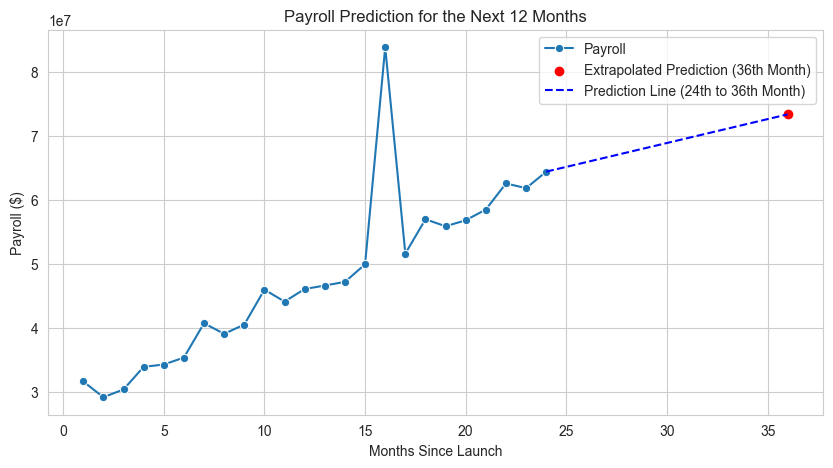

In [151]:
x1 = 36
y1 = 73422956.52
# Size of the plot
plt.figure(figsize=(10, 5))
# Line plot using Months_Since_Launch and Payroll columns where X is months and Y is Payroll
sns.lineplot(x=df['Months_Since_Launch'], y=df['Payroll'], marker='o', linestyle='-', label='Payroll')

# Add the 36th month prediction point marked prominently (in red)
plt.scatter(x1, y1, color='red', label='Extrapolated Prediction (36th Month)')
#plt.text(x1, y1, f"({x1}, {y1:,.2f})", color='red', fontsize=10, ha='right')
x_24 = 24
y_24 = 64464881.68

# Add a connecting line between the 24th and 36th points
plt.plot([x_24, x1], [y_24, y1], color='blue', linestyle='--', label='Prediction Line (24th to 36th Month)')


# Label the X and Y axes so that the graph is easy to understand
plt.xlabel("Months Since Launch")
plt.ylabel("Payroll ($)")
plt.title("Payroll Prediction for the Next 12 Months")

# Add legend
plt.legend()
# This will keep the grid on for better visualisation; if you set it to False, it will turn off the grid in the graph
plt.grid(True)
plt.show()

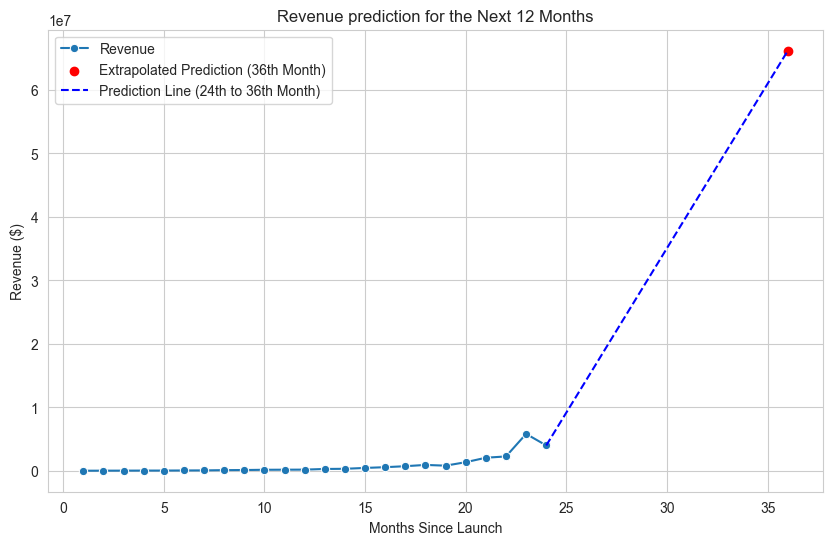

In [152]:
x1 = 36
y1 = 66174993.22
# The Size of the plot
# Visualize Revenue Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Months_Since_Launch'], y=df['Revenue'], marker='o', linestyle='-', label='Revenue')

# Add the 36th month prediction point marked prominently (in red)
plt.scatter(x1, y1, color='red', label='Extrapolated Prediction (36th Month)')
#plt.text(x1, y1, f"({x1}, {y1:,.2f})", color='red', fontsize=10, ha='right')
x_24 = 24
y_24 = 3996801.95


# Add a connecting line between the 24th and 36th points
plt.plot([x_24, x1], [y_24, y1], color='blue', linestyle='--', label='Prediction Line (24th to 36th Month)')


# Customize Plot
plt.xlabel("Months Since Launch")
plt.ylabel("Revenue ($)")
plt.title("Revenue prediction for the Next 12 Months")
plt.grid(True)
plt.legend()
plt.show()

The notebook has two major parts:
1. Linear Regression: Predict Revenue and payroll
    - In this section, we identified how a Huber Regressor model is better than OLS because the Huber can handle outliers very efficiently. Although our test data results were conflicting, since the size of that test was tiny (only single data), it may have given us a wrong result.
    - Moving ahead, we predicted payroll and revenue for 12 months ahead, and the results show great outcomes in the company's favour.
        — In my opinion, the Company has performed very well for the last 24 months and results are influenced by those factors only. So even for a timeline as short as the next 12 months, we can't be very certain that the company is going to perform well.
        — To actually get the idea about how the company will perform, there are multiple factors like EBITA, Future deals, Share holding patterns (if the founder is continuously selling his stock, that might be a red flag for any investor).
        — I'd need more details before finalising the that we should invest in the company or not.
    - We further predicted revenue for the next 20 years, which shows unrealistic figures that further show that I was right about the prediction of the 36th month.
        — Revenue and payroll are exponentially increasing with time, which is unbelievably high. Suggesting a client that we should invest in this company on the basis of this analysis is the same as investing in a company which has been showing growth for the last two years. But If I suggest that a client should invest in this company, that will be a speculation only not a properly analysed suggestion.

2. Logistic Regression: Predicting Negative Media Coverage
    - We have identified in during the Linear Regression that payroll after 12 months is **$73422956.52** and revenue after 12 months is **66,174,993.22**.
    - This shows that payroll expenses are higher than revenue that indicates financial instability in the company. Also, that can be the reason for the negative media coverage after 12 months.

Overall,
I cannot suggest this company to any investor because
1. I need more data.
2. With current data, Payroll predictions are higher than Revenue.
3. Also, Soon the media coverage outcome is going to be negative.





## There is a Video Presentation with this notbook please watch that to see the conclusion